<a href="https://www.kaggle.com/code/anjusukumaran4/spaceship-titanic-10-models?scriptVersionId=136204536" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

  #### The Spaceship Titanic challenge on Kaggle is a competition in which the task is to predict which passengers are transported to an alternate dimension, based on a set of variables.

 Importing libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
train=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

## EDA

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print("Shape of train dataset : ",train.shape)
print("Shape of test dataset : ",test.shape)

Shape of train dataset :  (8693, 14)
Shape of test dataset :  (4277, 13)


In [5]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
#analysing Transported column
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

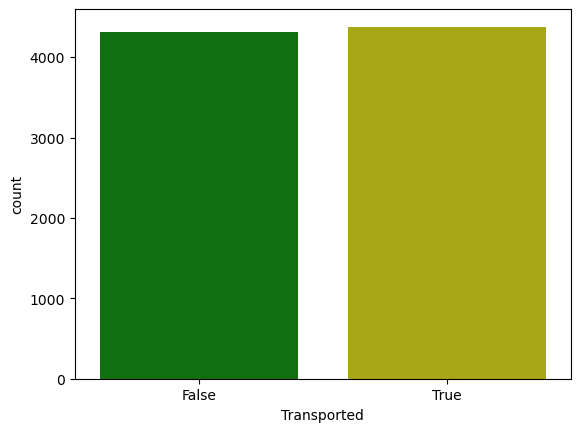

In [8]:
#countplot
sns.countplot(x='Transported',data=train,palette=['g','y'])

<Axes: xlabel='VIP', ylabel='count'>

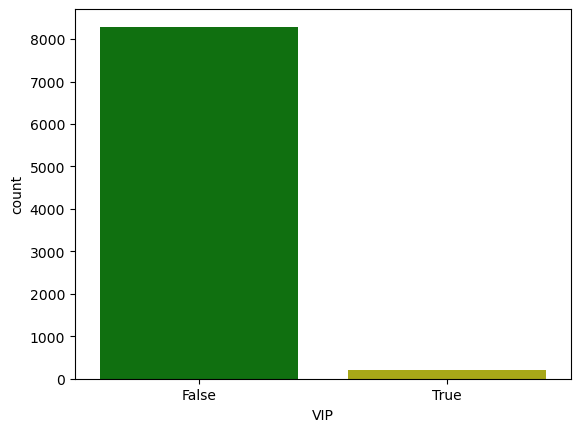

In [9]:
#analysing VIP column
sns.countplot(x='VIP',data=train,palette=['g','y'])

In [10]:
#create new feature
train['Not Transported']=1-train['Transported']

<Axes: xlabel='VIP'>

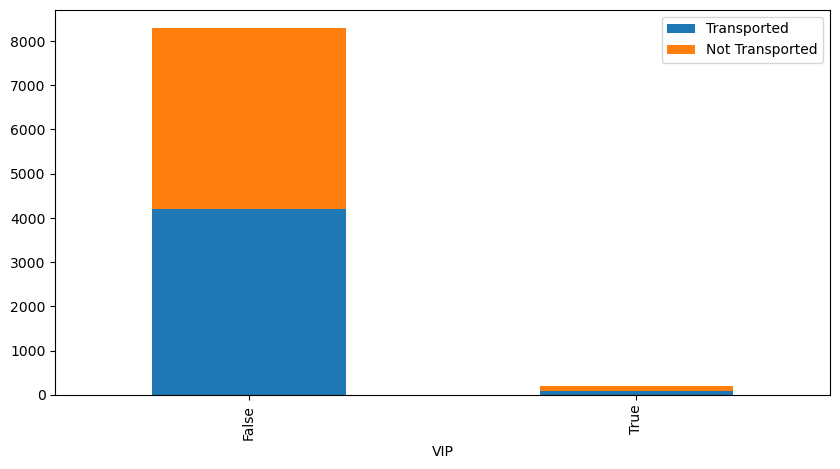

In [11]:
#visulazing transported based VIP column
train.groupby('VIP').agg('sum')[['Transported','Not Transported']].plot(kind='bar',figsize=(10,5),stacked=True)

## Data Cleaning

In [12]:
#checking the no of null values in the dataset
train.isnull().sum().sort_values(ascending=False)

CryoSleep          217
ShoppingMall       208
VIP                203
HomePlanet         201
Name               200
Cabin              199
VRDeck             188
FoodCourt          183
Spa                183
Destination        182
RoomService        181
Age                179
PassengerId          0
Transported          0
Not Transported      0
dtype: int64

In [13]:
#filling null values with mean in numerical columns

train['Age']=train['Age'].fillna(train['Age'].mean())
train['RoomService']=train['RoomService'].fillna(train['RoomService'].mean())
train['FoodCourt']=train['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall']=train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa']=train['Spa'].fillna(train['Spa'].mean())
train['VRDeck']=train['VRDeck'].fillna(train['VRDeck'].mean())

In [14]:
#filling null values with mode in categorical columns

train['HomePlanet']=train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['CryoSleep']=train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
train['Destination']=train['Destination'].fillna(train['Destination'].mode()[0])
train['VIP']=train['VIP'].fillna(train['VIP'].mode()[0])
train['Cabin']=train['Cabin'].fillna(train['Cabin'].mode()[0])

In [15]:
train.isnull().sum().sort_values(ascending=False)

Name               200
PassengerId          0
HomePlanet           0
CryoSleep            0
Cabin                0
Destination          0
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Transported          0
Not Transported      0
dtype: int64

## Feature Engineering

In [16]:
#count unique values in cabin column
train.Cabin.value_counts()

G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: Cabin, Length: 6560, dtype: int64

In [17]:
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])
train['Cabin_side'].unique()

array(['P', 'S'], dtype=object)

P - cabin side Port ;
S - cabin side Starboard

In [18]:
df1=train
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Not Transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,S


In [19]:
#converting categorical feature into numerical feature
df1.HomePlanet=df1.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2})
df1.Cabin_side=df1.Cabin_side.map({'P':0,'S':1})

In [20]:
df1.Destination=df1.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})

In [21]:
df1["CryoSleep"].replace(False,0,inplace=True)
df1["CryoSleep"].replace(True,1,inplace=True)
df1["VIP"].replace(False,0,inplace=True)
df1["VIP"].replace(True,1,inplace=True)
df1["Transported"].replace(False,0,inplace=True)
df1["Transported"].replace(True,1,inplace=True)

In [22]:
#droping unwanted columns
df1=train.drop(['Name','Cabin','Not Transported'],axis=1)

In [23]:
#final_df
df1.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
0,0001_01,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0002_01,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1
2,0003_01,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,0003_02,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0004_01,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1


In [24]:
df1.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_side
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.957207,0.349362,0.505694,28.827930,0.022892,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624,0.516162
std,0.667613,0.476796,0.814966,14.339054,0.149568,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.500016,0.499767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,1.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000


<Axes: >

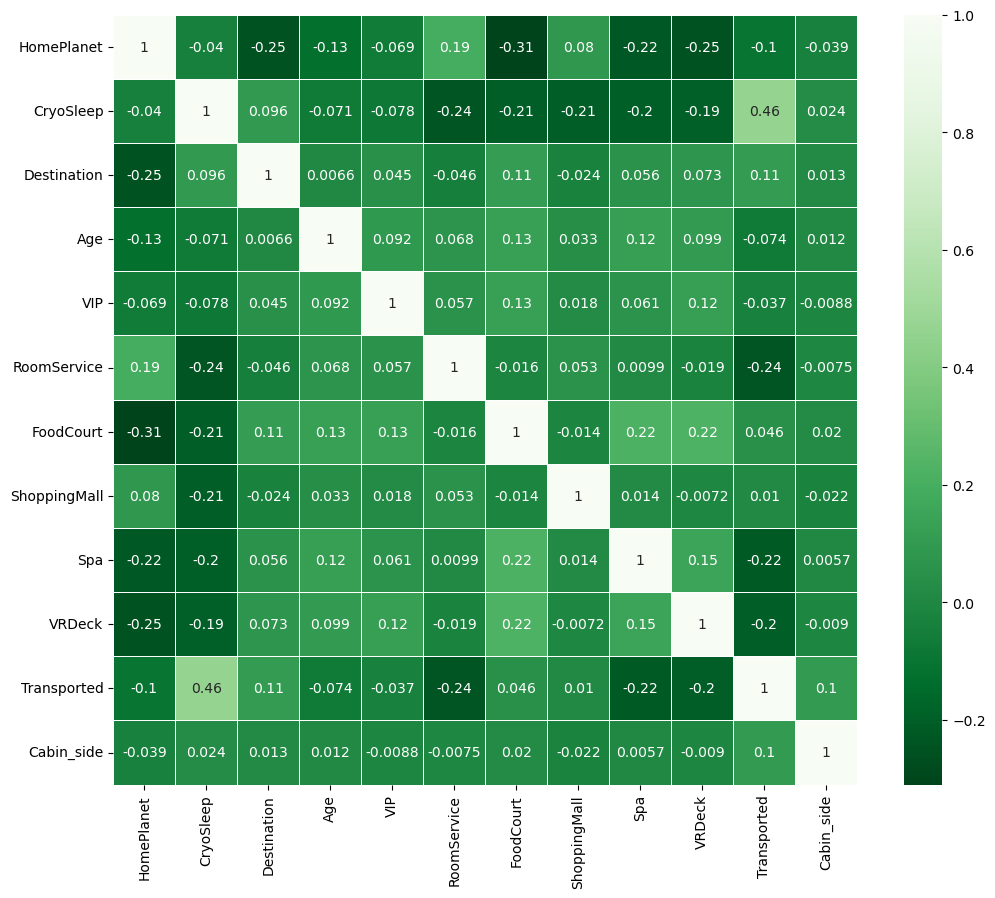

In [25]:
#correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True,linewidth=0.4,cmap='Greens_r')

In [26]:
#checking null values
df1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_side      0
dtype: int64

## Model Building

#### Splitting data

In [27]:
X=df1.drop(['Transported'],axis=1)
y=df1['Transported']

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
print(f'X_train',X_train.shape)
print(f'y_train',y_train.shape)
print(f'X_val',X_val.shape)
print(f'y_val',y_val.shape)

X_train (6954, 12)
y_train (6954,)
X_val (1739, 12)
y_val (1739,)


## 1. K Nearest Neighbor

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
#to find which value shows the lowest werror
error = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error.append(np.mean(pred_i != y_val))

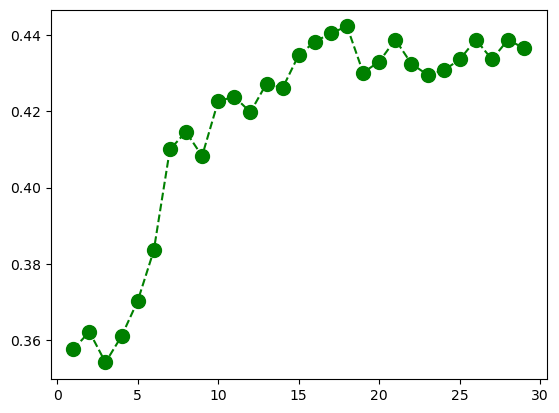

In [32]:
plt.plot(range(1,30),error,color='green',linestyle='--',marker='o',markersize=10,markerfacecolor='g')

From this graph, K value of 3 seem to show the lowest mean error.

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Prediction and Accuracy

In [34]:
from sklearn.metrics import accuracy_score

pred1 = knn.predict(X_val)
a1=accuracy_score(y_val,pred1)
print("Accuracy KNN Classifier : ",round(accuracy_score(y_val,pred1),4)*100, '%')

Accuracy KNN Classifier :  64.58 %


## 2. AdaBoost Classifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier

adbc=AdaBoostClassifier(n_estimators=115,learning_rate=0.412,random_state=42)
adbc.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.412, n_estimators=115, random_state=42)

#### Prediction and Accuracy

In [36]:
pred2=adbc.predict(X_val)
a2=accuracy_score(y_val,pred2)
print("Accuracy AdaBoost Classifier : ",round(accuracy_score(y_val,pred2),4)*100, '%')

Accuracy AdaBoost Classifier :  78.61 %


## 3. Gaussian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

#### Prediction and Accuracy

In [38]:
pred3=gnb.predict(X_val)
a3=accuracy_score(y_val,pred3)
print("Accuracy Gaussian Naive Bayes : ",round(accuracy_score(y_val,pred3),4)*100, '%')

Accuracy Gaussian Naive Bayes :  65.84 %


## 4. Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

#### Prediction and Accuracy

In [40]:
pred4=dtc.predict(X_val)
a4=accuracy_score(y_val,pred4)
print("Accuracy Decision Tree Classifier : ",round(accuracy_score(y_val,pred4),4)*100, '%')

Accuracy Decision Tree Classifier :  73.03 %


## 5. Multinomial Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
mnnb= MultinomialNB()
mnnb.fit(X_train,y_train)

MultinomialNB()

#### Prediction and Accuracy

In [42]:
pred5=mnnb.predict(X_val)
a5=accuracy_score(y_val,pred5)
print("Accuracy Multinomial Naive Bayes : ",round(accuracy_score(y_val,pred5),4)*100, '%')

Accuracy Multinomial Naive Bayes :  72.28 %


## 6. Support Vector Classifier

In [43]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

#### Prediction and Accuracy

In [44]:
pred6 =svc.predict(X_val)
a6=accuracy_score(y_val,pred6)
print("Accuracy Support Vector Classifier : ",round(accuracy_score(y_val,pred6),1)*100, '%')

Accuracy Support Vector Classifier :  60.0 %


## 7. Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=600,max_depth=18,random_state=42,min_samples_leaf=4)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=4, n_estimators=600,
                       random_state=42)

#### Prediction and Accuracy

In [46]:
pred7=rfc.predict(X_val)
a7=accuracy_score(y_val,pred7)
print("Accuracy Random Forest Classifier : ",round(accuracy_score(y_val,pred7),4)*100, '%')

Accuracy Random Forest Classifier :  80.22 %


## 8. Multi-layer Perceptron classifier

In [47]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

#### Prediction and Accuracy

In [48]:
pred8=mlp.predict(X_val)
a8=accuracy_score(y_val,pred8)
print("Accuracy Multi-layer Perceptron classifier : ",round(accuracy_score(y_val,pred8),4)*100, '%')

Accuracy Multi-layer Perceptron classifier :  51.29 %


## 9. Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=210,learning_rate=0.01,random_state=42,max_depth=10,subsample=0.7)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=210,
                           random_state=42, subsample=0.7)

#### Prediction and Accuracy

In [50]:
pred9=gbc.predict(X_val)
a9=accuracy_score(y_val,pred9)
print("Accuracy Gradient Boosting : ",round(accuracy_score(y_val,pred9),5)*100, '%')

Accuracy Gradient Boosting :  80.104 %


## 10. Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression(random_state=0)
lg.fit(X_train,y_train)

LogisticRegression(random_state=0)

#### Prediction and Accuracy

In [52]:
pred10=gbc.predict(X_val)
a10=accuracy_score(y_val,pred10)
print("Accuracy Logistic Regression : ",round(accuracy_score(y_val,pred10),4)*100, '%')


Accuracy Logistic Regression :  80.10000000000001 %


## Model  Comparison

In [53]:
models=['K Nearest Neighbor','AdaBoost Classifier','Gaussian Naive Bayes','Decision Tree Classifier','Multinomial Naive Bayes',
        'Support Vector Classifier','Random Forest Classifier','Multi-layer Perceptron classifier','Gradient Boosting','Logistic Regression']
acc=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]
data={'Models':['K Nearest Neighbor','AdaBoost Classifier','Gaussian Naive Bayes','Decision Tree Classifier','Multinomial Naive Bayes',
                'Support Vector Classifier','Random Forest Classifier','Multi-layer Perceptron classifier','Gradient Boosting','Logistic Regression'],
      'Accuracy':[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]}
pd.DataFrame(data).style.background_gradient(cmap='Blues')

,Models,Accuracy
0,K Nearest Neighbor,0.645773
1,AdaBoost Classifier,0.786084
2,Gaussian Naive Bayes,0.658424
3,Decision Tree Classifier,0.730305
4,Multinomial Naive Bayes,0.722829
5,Support Vector Classifier,0.550891
6,Random Forest Classifier,0.802185
7,Multi-layer Perceptron classifier,0.512938
8,Gradient Boosting,0.801035
9,Logistic Regression,0.801035


## Visualizing Accuracy of 10 Models 

<Axes: title={'center': 'Comparing Models'}, xlabel='Accuracy'>

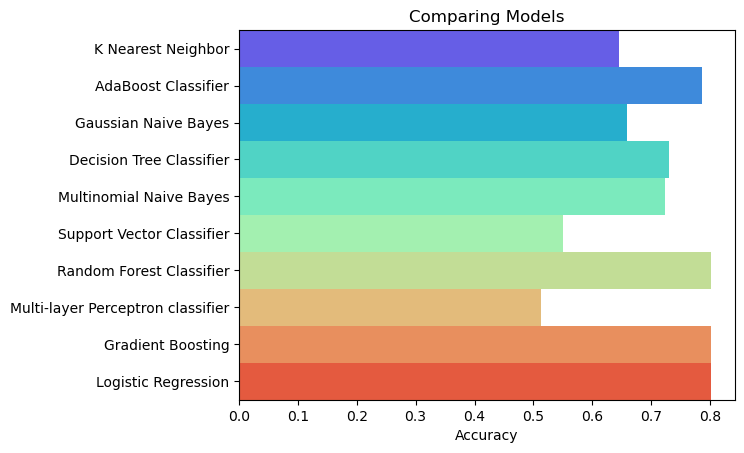

In [54]:
#plotting
plt.title('Comparing Models')
plt.xlabel('Accuracy')
sns.barplot(x=acc,y=models,width=1,palette='rainbow')

## Submission

#### Test Data Exploration

In [55]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [56]:
print("Shape of test dataset : ",test.shape)

Shape of test dataset :  (4277, 13)


In [57]:
#checking the no of null values in the dataset
test.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [58]:
#filling null values with mean in numerical columns

test['Age']=test['Age'].fillna(test['Age'].mean())
test['RoomService']=test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt']=test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall']=test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa']=test['Spa'].fillna(test['Spa'].mean())
test['VRDeck']=test['VRDeck'].fillna(test['VRDeck'].mean())

In [59]:
#filling null values with mode in categorical columns

test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])
test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode()[0])

In [60]:
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])
test['Cabin_side'].unique()

array(['S', 'P'], dtype=object)

In [61]:
#converting categorical feature into numerical feature
test.HomePlanet=test.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2})
test.Cabin_side=test.Cabin_side.map({'P':0,'S':1})

In [62]:
test.Destination=test.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})

In [63]:
test["CryoSleep"].replace(False,0,inplace=True)
test["CryoSleep"].replace(True,1,inplace=True)
test["VIP"].replace(False,0,inplace=True)
test["VIP"].replace(True,1,inplace=True)

In [64]:
#droping unwanted columns
test_df=test.drop(['Name','Cabin'],axis=1)

In [65]:
#final_df
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_side
0,0013_01,1,1,0,27.0,0,0.0,0.0,0.0,0.0,0.0,1
1,0018_01,1,0,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1
2,0019_01,0,1,2,31.0,0,0.0,0.0,0.0,0.0,0.0,1
3,0021_01,0,0,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1
4,0023_01,1,0,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1


In [66]:
#checking null values
test_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_side      0
dtype: int64

In [67]:
#final prediction we use the Random Forest Classifier with 80% accuracy
pred_final=rfc.predict(test_df)

In [68]:
a=test_df['PassengerId']
x=pd.DataFrame(a)
b=pred_final
y=pd.DataFrame(b)

In [69]:
final=pd.concat([x,y],axis=1)
final.replace(0,False,inplace=True)
final.replace(1,True,inplace=True)
final.rename(columns={0:'Transported'},inplace=True)
final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [70]:
final.to_csv('spaceship_titanic.csv',index=False)

<Axes: xlabel='Transported', ylabel='count'>

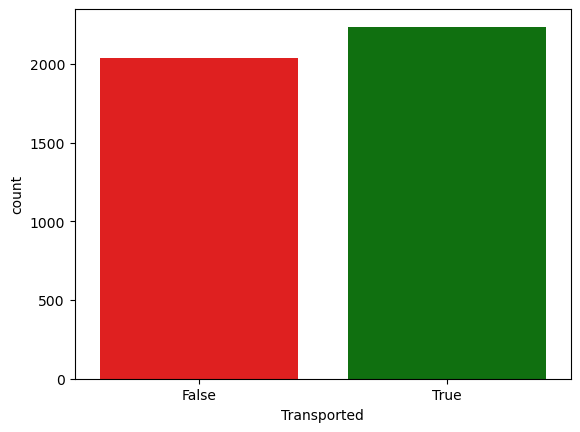

In [71]:
#visualizing predicted values
sns.countplot(x='Transported',data=final,palette=['r','g'])